In [1]:
# importing necessary liberaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import GridSearchCV



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Campus_Recruitment_Data.csv')

In [4]:
nrows, ncols = df.shape
print(f"Number of rows: {nrows}\nNumber of columns: {ncols}\nColumn names: {df.columns.tolist()}")


Number of rows: 10000
Number of columns: 15
Column names: ['Unnamed: 0', 'StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs', 'PlacementStatus', 'salary']


In [5]:
# checking for the data

df.head(4)

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus,salary
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced,0
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed,1000000
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced,0
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed,950000


In [6]:
# Renaming columns
df.rename(columns={
    'Communication Skill Rating': 'communi_rating',
    'Workshops/Certificatios': 'workshops'
}, inplace=True)

# Removing 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display updated columns
print("Updated DataFrame columns:", df.columns.tolist())


Updated DataFrame columns: ['StudentId', 'CGPA', 'Major Projects', 'workshops', 'Mini Projects', 'Skills', 'communi_rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs', 'PlacementStatus', 'salary']


In [7]:
# checking for data type of columns that are in the dataset
df.dtypes

,0
StudentId,int64
CGPA,float64
Major Projects,int64
workshops,int64
Mini Projects,int64
Skills,int64
communi_rating,float64
Internship,object
Hackathon,object
12th Percentage,int64


In [8]:
# checking statical summery
df.describe()

,StudentId,CGPA,Major Projects,workshops,Mini Projects,Skills,communi_rating,12th Percentage,10th Percentage,backlogs,salary
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,7.555200,4.323960,69.159400,74.501500,1.73840,3.749350e+05
std,2886.89568,0.640131,0.665901,0.867968,0.904272,0.927922,0.411622,10.430459,8.919527,1.39512,4.733645e+05
min,1.00000,6.500000,0.000000,0.000000,0.000000,6.000000,3.000000,55.000000,57.000000,0.00000,0.000000e+00
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,7.000000,4.000000,59.000000,67.000000,1.00000,0.000000e+00
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,8.000000,4.400000,70.000000,73.000000,1.00000,0.000000e+00
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,8.000000,4.700000,78.000000,83.000000,3.00000,9.000000e+05
max,10000.00000,9.100000,2.000000,3.000000,3.000000,9.000000,4.800000,90.000000,88.000000,7.00000,1.300000e+06


In [11]:
# Checking for missing values in the dataset
print("\nMissing Values Check:")
missing_values = df.isnull().sum()
total = df.shape[0]
print(missing_values[missing_values > 0])
print("\nPercentage of missing values:")
print((missing_values / total) * 100)



Missing Values Check:
Series([], dtype: int64)

Percentage of missing values:
StudentId          0.0
CGPA               0.0
Major Projects     0.0
workshops          0.0
Mini Projects      0.0
Skills             0.0
communi_rating     0.0
Internship         0.0
Hackathon          0.0
12th Percentage    0.0
10th Percentage    0.0
backlogs           0.0
PlacementStatus    0.0
salary             0.0
dtype: float64


In [27]:
# Encode categorical variables using the label encoder
le = preprocessing.LabelEncoder()
df['Internship'] = le.fit_transform(df['Internship'])
df['Hackathon'] = le.fit_transform(df['Hackathon'])
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed=1, NotPlaced=0

In [28]:
df.head(10)

,StudentId,CGPA,Major Projects,workshops,Mini Projects,Skills,communi_rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus,salary
0,1,7.5,1,1,1,6,4.4,0,0,61,79,2,0,0
1,2,8.9,0,3,2,9,4.0,1,1,78,82,0,1,1000000
2,3,7.3,1,2,2,8,4.8,1,0,79,80,2,0,0
3,4,7.5,1,1,2,8,4.4,1,1,81,80,0,1,950000
4,5,8.3,1,2,2,8,4.5,1,1,74,88,0,1,950000
5,6,7.0,0,2,2,7,4.2,1,0,55,66,4,0,0
6,7,7.7,1,1,1,7,4.0,0,0,62,65,4,0,0
7,8,7.7,2,1,0,8,3.5,1,1,59,72,3,0,0
8,9,6.5,1,1,0,8,3.9,0,1,75,71,2,0,0
9,10,7.8,1,3,2,7,4.4,1,1,85,86,0,1,450000


In [29]:
# Checking for duplicate rows
nduplicates = df.duplicated().sum()

if nduplicates > 0:
    print(f"There are {nduplicates} duplicate rows in the dataset.")
    print("Duplicate rows:")
    print(df[df.duplicated(keep=False)])  # Show all duplicates
else:
    print("There are no duplicate rows in the dataset.")


There are no duplicate rows in the dataset.


In [30]:
# Checking unique values and their counts for each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col} : {len(unique_values)} unique values -> {unique_values[:10]}")  # Show only the first 10 unique values
    if len(unique_values) > 10:
        print(f"... and {len(unique_values) - 10} more unique values.")


StudentId : 10000 unique values -> [ 1  2  3  4  5  6  7  8  9 10]
... and 9990 more unique values.
CGPA : 27 unique values -> [7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4]
... and 17 more unique values.
Major Projects : 3 unique values -> [1 0 2]
workshops : 4 unique values -> [1 3 2 0]
Mini Projects : 4 unique values -> [1 2 0 3]
Skills : 4 unique values -> [6 9 8 7]
communi_rating : 19 unique values -> [4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7]
... and 9 more unique values.
Internship : 2 unique values -> [0 1]
Hackathon : 2 unique values -> [0 1]
12th Percentage : 36 unique values -> [61 78 79 81 74 55 62 59 75 85]
... and 26 more unique values.
10th Percentage : 32 unique values -> [79 82 80 88 66 65 72 71 86 87]
... and 22 more unique values.
backlogs : 8 unique values -> [2 0 4 3 1 7 5 6]
PlacementStatus : 2 unique values -> [0 1]
salary : 18 unique values -> [      0 1000000  950000  450000 1250000  400000  750000  550000 1100000
  500000]
... and 8 more unique values.


In [31]:
df.fillna(0,inplace=True)

In [24]:
print(df["Internship"].dtype)


object


<Axes: ylabel='Frequency'>

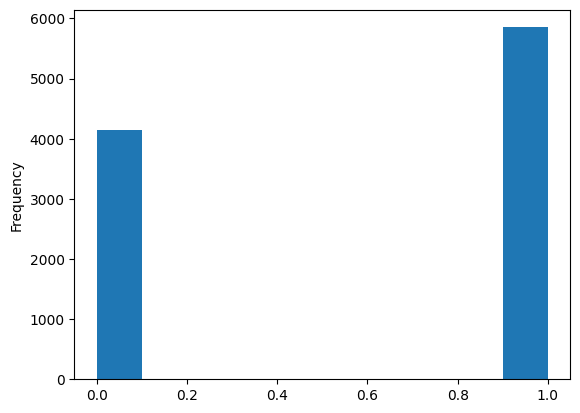

In [32]:
# Assuming 'Yes' and 'No' are the main values in 'Internship' column
df["Internship"].plot(kind='hist')

<Axes: ylabel='Frequency'>

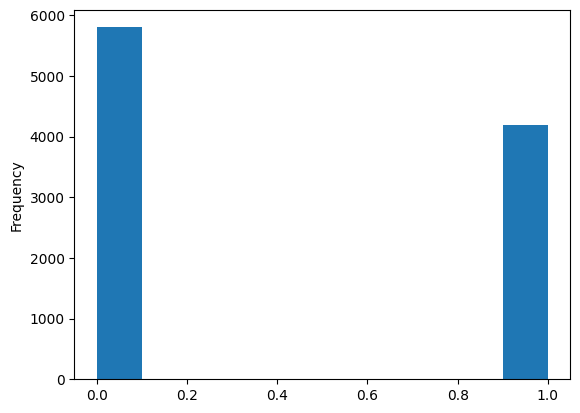

In [33]:
df["PlacementStatus"].plot(kind='hist')
# ALmost all half people are not placed

In [34]:
df.head()

,StudentId,CGPA,Major Projects,workshops,Mini Projects,Skills,communi_rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus,salary
0,1,7.5,1,1,1,6,4.4,0,0,61,79,2,0,0
1,2,8.9,0,3,2,9,4.0,1,1,78,82,0,1,1000000
2,3,7.3,1,2,2,8,4.8,1,0,79,80,2,0,0
3,4,7.5,1,1,2,8,4.4,1,1,81,80,0,1,950000
4,5,8.3,1,2,2,8,4.5,1,1,74,88,0,1,950000


In [37]:
# Correlation with PlacementStatus
placement_corr = df.corr()['PlacementStatus'].sort_values(ascending=False)
print("Correlation with PlacementStatus:")
print(placement_corr)


Correlation with PlacementStatus:
PlacementStatus    1.000000
salary             0.931406
Skills             0.515559
10th Percentage    0.505746
Internship         0.482491
workshops          0.475186
12th Percentage    0.469763
communi_rating     0.427284
CGPA               0.423131
Mini Projects      0.362268
Hackathon          0.323659
Major Projects     0.260340
StudentId          0.004294
backlogs          -0.751820
Name: PlacementStatus, dtype: float64


Skills, Internship, 10th Percentage, and Workshops show moderate positive correlations with placement status, meaning these factors positively influence placement chances.
Backlogs has a strong negative correlation, indicating that more backlogs significantly reduce the likelihood of placement.
Salary is highly correlated with placement status, showing a strong relationship between getting placed and a higher salary.
Other factors such as CGPA and Communication Rating also moderately impact placement, but not as strongly as Skills or Workshops.

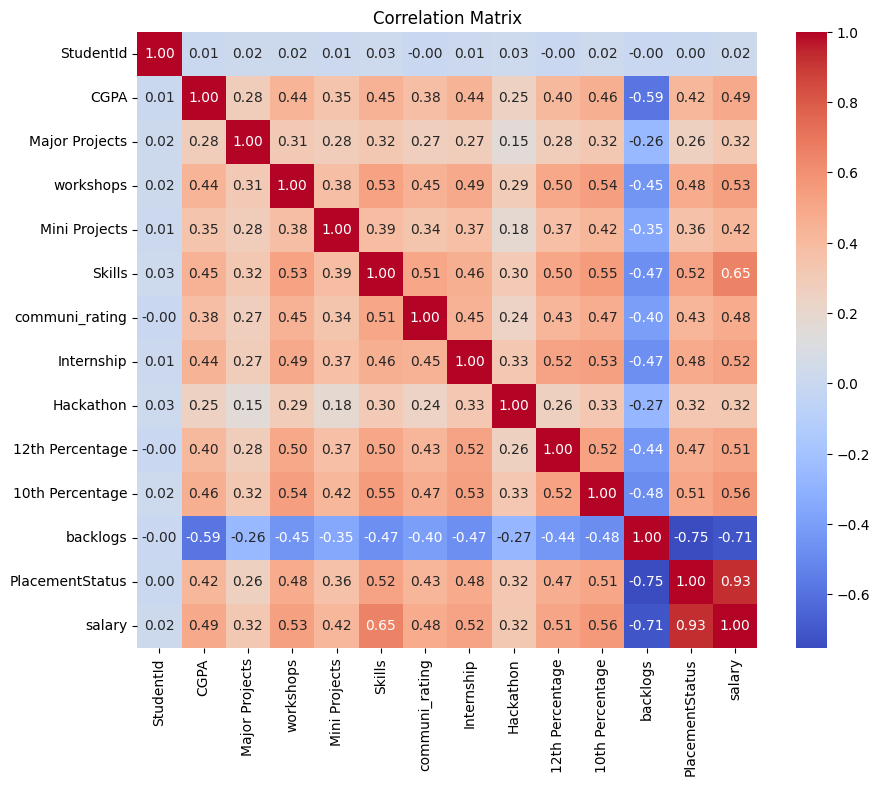

In [38]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Checking for correlation between columns
correlation_matrix = df.corr()
print(correlation_matrix)


                 StudentId      CGPA  Major Projects  workshops  \
StudentId         1.000000  0.005724        0.015655   0.015924   
CGPA              0.005724  1.000000        0.280601   0.435928   
Major Projects    0.015655  0.280601        1.000000   0.309196   
workshops         0.015924  0.435928        0.309196   1.000000   
Mini Projects     0.011872  0.349686        0.279110   0.377865   
Skills            0.026606  0.451911        0.322387   0.526162   
communi_rating   -0.002269  0.383547        0.273691   0.450294   
Internship        0.013683  0.444130        0.274960   0.491430   
Hackathon         0.026297  0.251628        0.153547   0.293709   
12th Percentage  -0.003082  0.404971        0.279837   0.499421   
10th Percentage   0.024115  0.462313        0.317149   0.535708   
backlogs         -0.001678 -0.585865       -0.258719  -0.449325   
PlacementStatus   0.004294  0.423131        0.260340   0.475186   
salary            0.015935  0.489658        0.316145   0.53060

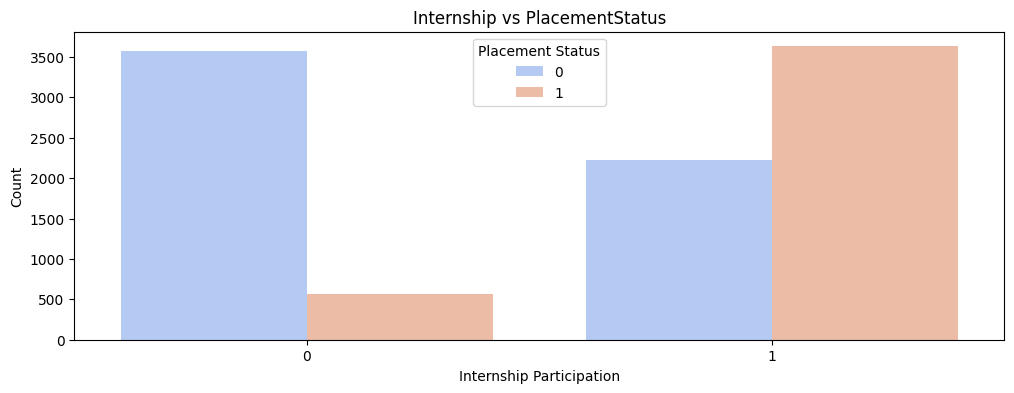

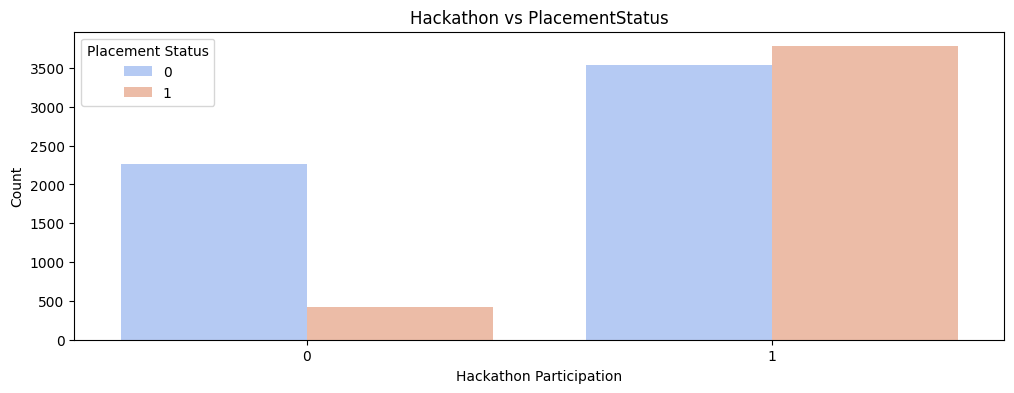

In [40]:
# Count plot for Internship vs PlacementStatus
plt.figure(figsize=(12, 4))
sns.countplot(x='Internship', hue='PlacementStatus', data=df, palette='coolwarm')
plt.title('Internship vs PlacementStatus')
plt.xlabel('Internship Participation')
plt.ylabel('Count')
plt.legend(title='Placement Status')
plt.show()

# Count plot for Hackathon vs PlacementStatus
plt.figure(figsize=(12, 4))
sns.countplot(x='Hackathon', hue='PlacementStatus', data=df, palette='coolwarm')
plt.title('Hackathon vs PlacementStatus')
plt.xlabel('Hackathon Participation')
plt.ylabel('Count')
plt.legend(title='Placement Status')
plt.show()


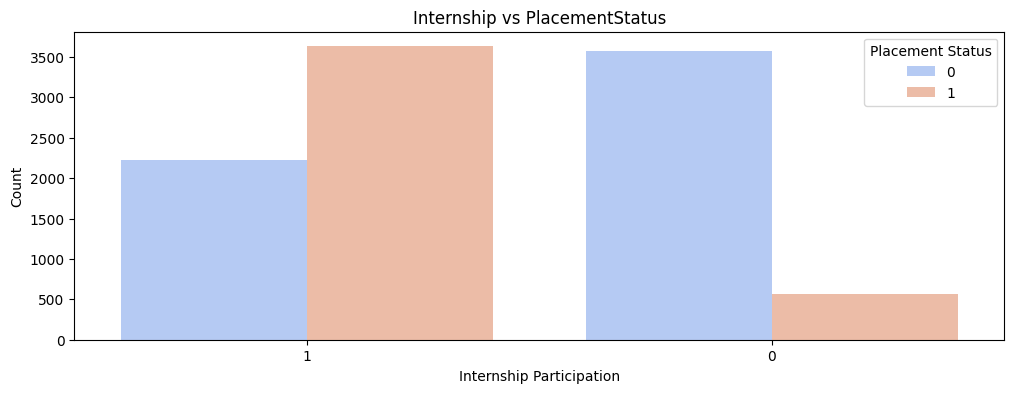

In [41]:
# Adjusting order for clarity
plt.figure(figsize=(12, 4))
sns.countplot(x='Internship', hue='PlacementStatus', data=df, palette='coolwarm', order=df['Internship'].value_counts().index)
plt.title('Internship vs PlacementStatus')
plt.xlabel('Internship Participation')
plt.ylabel('Count')
plt.legend(title='Placement Status')
plt.show()


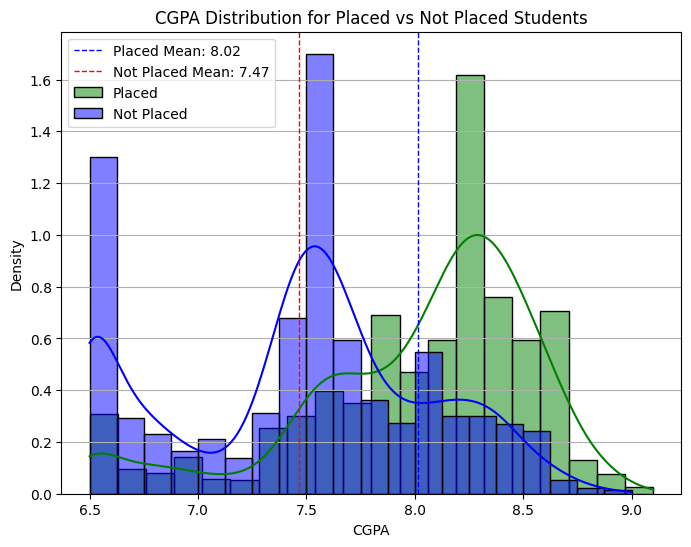

In [44]:
# Distribution of CGPA for Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['CGPA'], label='Placed', color='green', kde=True, stat="density", bins=20, alpha=0.5)
sns.histplot(df[df['PlacementStatus'] == 0]['CGPA'], label='Not Placed', color='blue', kde=True, stat="density", bins=20, alpha=0.5)

# Adding mean lines
placed_mean = df[df['PlacementStatus'] == 1]['CGPA'].mean()
not_placed_mean = df[df['PlacementStatus'] == 0]['CGPA'].mean()
plt.axvline(placed_mean, color='blue', linestyle='dashed', linewidth=1, label=f'Placed Mean: {placed_mean:.2f}')
plt.axvline(not_placed_mean, color='red', linestyle='dashed', linewidth=1, label=f'Not Placed Mean: {not_placed_mean:.2f}')

# Finalizing the plot
plt.title('CGPA Distribution for Placed vs Not Placed Students')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y')
plt.show()


<ipython-input-45-791dde029ce4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='backlogs', data=df, palette='coolwarm')


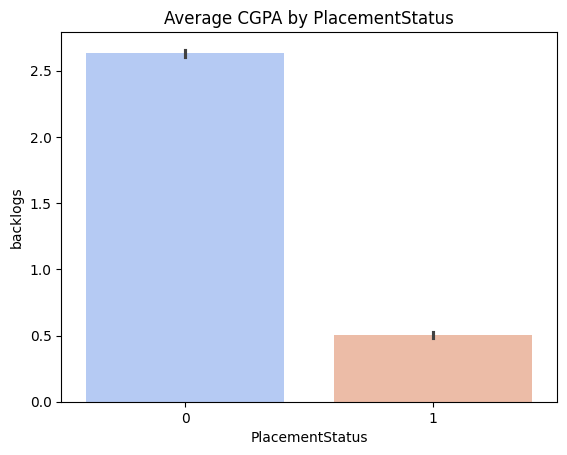

In [45]:
# Bar plot showing average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='backlogs', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

**Backlog** is the most affecting factor for the placement.

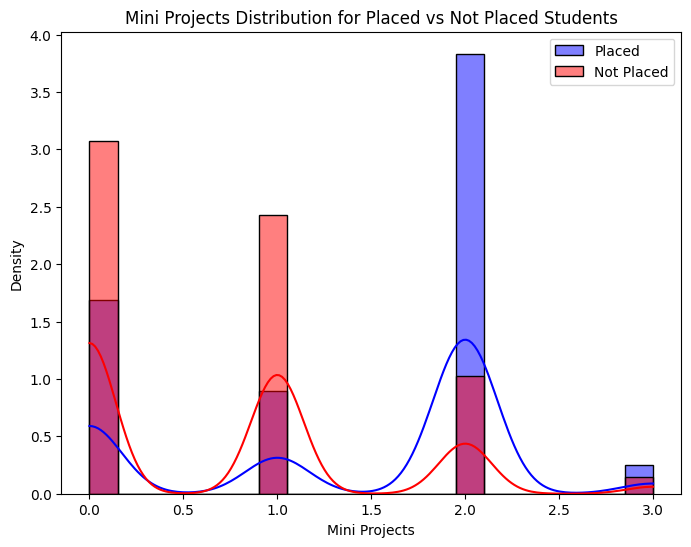

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['Mini Projects'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['Mini Projects'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('Mini Projects Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()

In [46]:
# Removing unnecessary columns
# 1. StudentId: No correlation with PlacementStatus as per heatmap analysis
# 2. PlacementStatus: This is the target variable, should be removed from features
# 3. Salary: Not a factor affecting placement, comes into play only after placement

x = df.drop(['StudentId', 'PlacementStatus', 'salary'], axis=1)

# Checking the shape of the new DataFrame
print("Shape of the features DataFrame after dropping columns:", x.shape)


Shape of the features DataFrame after dropping columns: (10000, 11)


In [47]:
x = df.drop(['StudentId', 'PlacementStatus', 'salary'], axis=1).copy()


In [49]:
x

,CGPA,Major Projects,workshops,Mini Projects,Skills,communi_rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs
0,7.5,1,1,1,6,4.4,0,0,61,79,2
1,8.9,0,3,2,9,4.0,1,1,78,82,0
2,7.3,1,2,2,8,4.8,1,0,79,80,2
3,7.5,1,1,2,8,4.4,1,1,81,80,0
4,8.3,1,2,2,8,4.5,1,1,74,88,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,7,3.9,1,0,85,66,4
9996,7.4,0,1,0,9,4.8,0,0,84,67,1
9997,8.4,1,3,0,7,4.8,1,1,79,81,0
9998,8.9,0,3,2,8,4.8,1,1,71,85,0


In [50]:
y = df['PlacementStatus']

In [51]:
y

,PlacementStatus
0,0
1,1
2,0
3,1
4,1
...,...
9995,0
9996,1
9997,1
9998,1


In [ ]:
y

,PlacementStatus
0,0
1,1
2,0
3,1
4,1
...,...
9995,0
9996,1
9997,1
9998,1


In [52]:
x.head()

,CGPA,Major Projects,workshops,Mini Projects,Skills,communi_rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs
0,7.5,1,1,1,6,4.4,0,0,61,79,2
1,8.9,0,3,2,9,4.0,1,1,78,82,0
2,7.3,1,2,2,8,4.8,1,0,79,80,2
3,7.5,1,1,2,8,4.4,1,1,81,80,0
4,8.3,1,2,2,8,4.5,1,1,74,88,0


In [53]:
# spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Hyperparameter tuning, cross validation and model evaluation

In [54]:
# parameters from random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters Decision
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters for KNeighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [55]:
# Initializing the models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [56]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1)

In [57]:
grid_rf.fit(x_train, y_train)
ypred=grid_rf.predict(x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [58]:
grid_dt.fit(x_train, y_train)
ypred=grid_dt.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [59]:
grid_knn.fit(x_train, y_train)
ypred=grid_knn.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [60]:
print("Best parameters for Random Forest: ", grid_rf.best_params_)
print("Best parameters for DecisionTreeClassifiert: ", grid_dt.best_params_)
print("Best parameters for KNeighborsClassifier: ", grid_knn.best_params_)

Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [64]:
# Use best estimators
rf_best = grid_rf.best_estimator_
dt_best = grid_dt.best_estimator_
knn_best = grid_knn.best_estimator_


Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}




In [66]:
classify = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
classify.fit(x_train, y_train)
ypred=classify.predict(x_test)

In [67]:
ypred

array([0, 0, 1, ..., 1, 0, 1])

In [68]:
ypred

array([0, 0, 1, ..., 1, 0, 1])

In [69]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [70]:
accuracy_score

0.937

In [71]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [72]:
confusion_metrix

array([[1687,   87],
       [ 102, 1124]])

True Negatives (TN): 1687 instances were correctly predicted as negative.
False Positives (FP): 87 instances were incorrectly predicted as positive (Type I error).
False Negatives (FN): 102 instances were incorrectly predicted as negative (Type II error).
True Positives (TP): 1124 instances were correctly predicted as positive.
Overall, the model performed well, accurately identifying a large number of positive and negative instances, with relatively few misclassifications.

In [73]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

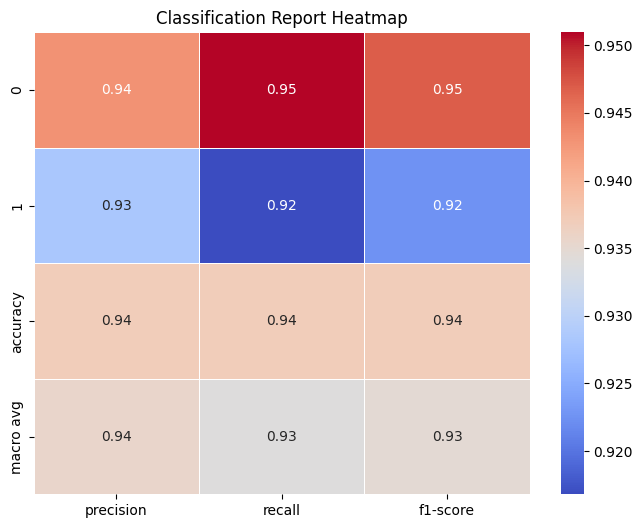

In [74]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [75]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.937
Precision: 0.9369258681944298
Recall: 0.937
F1-Score: 0.9369387270412832


In [76]:
importances = RandomForestClassifier.feature_importances_

In [77]:
importances = classify.feature_importances_

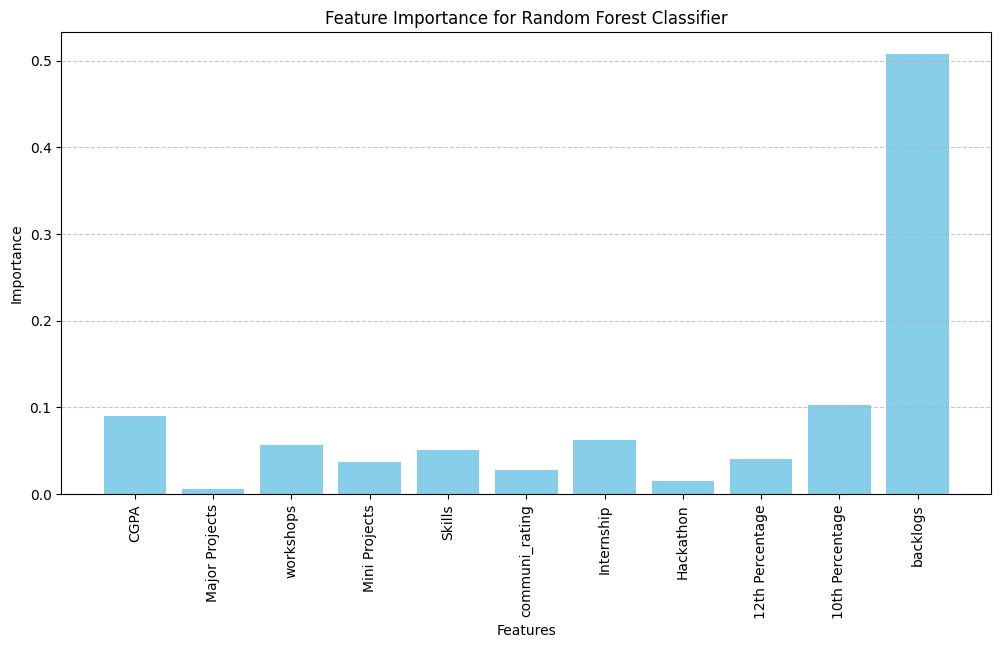

In [81]:
plt.figure(figsize=(12, 6))
plt.bar(x.columns, importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [82]:
ypred_pob=classify.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, ypred_pob)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9864383766973007

In [83]:
ypred_pob

array([0.0184506 , 0.01998886, 0.54428973, ..., 0.62740708, 0.00831321,
       0.9961476 ])

In [84]:
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.9864383766973007

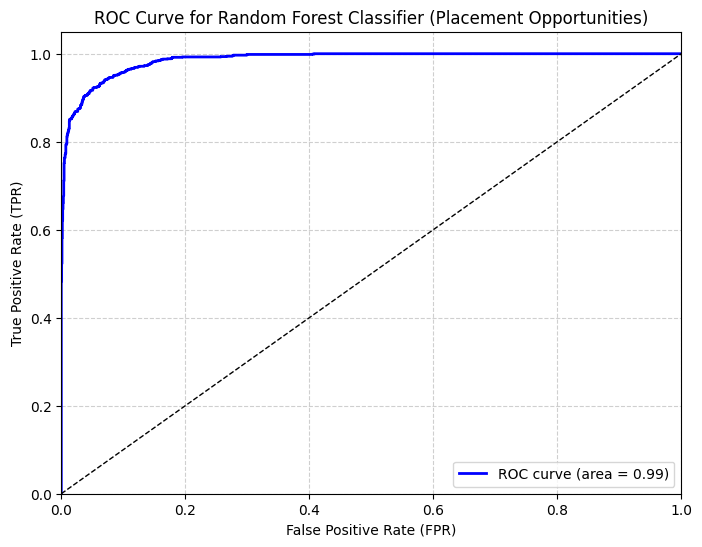

In [85]:
plt.figure(figsize=(8, 6))

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='blue', lw=2)

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Setting limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier (Placement Opportunities)')

# Legend
plt.legend(loc="lower right")

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [86]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights='distance')

In [87]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [88]:
ypred=knn.predict(x_test)

In [89]:
ypred

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [91]:
accuracy_score

0.8676666666666667

In [92]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [93]:
confusion_metrix

array([[1565,  209],
       [ 188, 1038]])

True Negatives (TN): 1565 instances were correctly predicted as negative.
False Positives (FP): 209 instances were incorrectly predicted as positive (Type I error).
False Negatives (FN): 188 instances were incorrectly predicted as negative (Type II error).
True Positives (TP): 1038 instances were correctly predicted as positive.

In [94]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

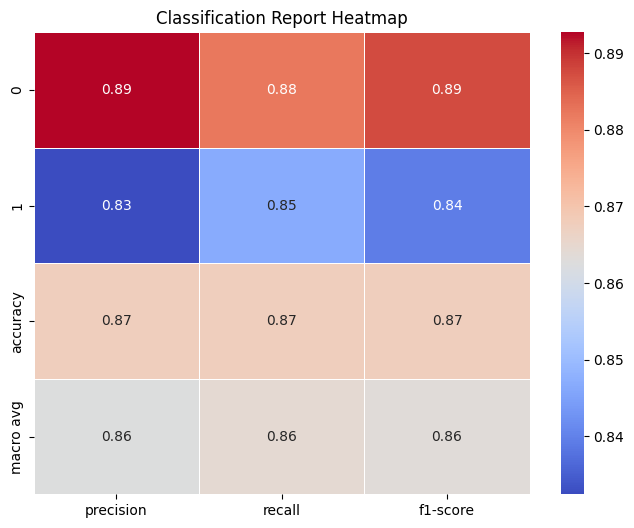

In [95]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [96]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.8676666666666667
Precision: 0.868089169321069
Recall: 0.8676666666666667
F1-Score: 0.8678345739697073


In [97]:
clf=DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)

In [98]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [99]:
ypred=clf.predict(x_test)

In [100]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [101]:
accuracy_score

0.9353333333333333

In [102]:
confusion_metrix=metrics.confusion_matrix(y_test,ypred)

In [103]:
confusion_metrix

array([[1674,  100],
       [  94, 1132]])

In [104]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

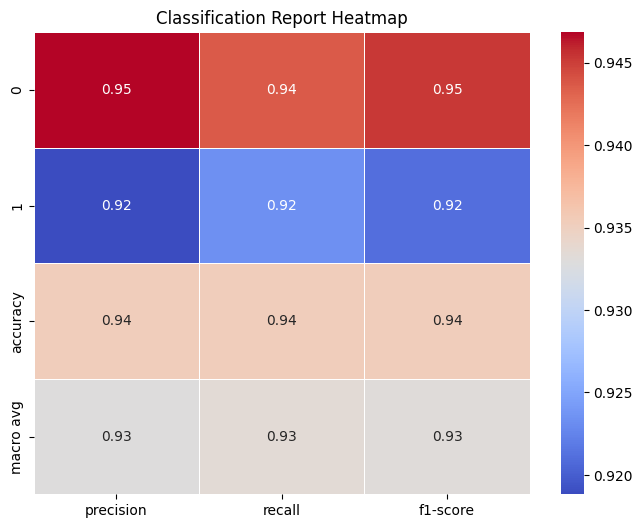

In [105]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [106]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9353333333333333
Precision: 0.9353893361540421
Recall: 0.9353333333333333
F1-Score: 0.9353574879737544



 # Voting Classifier

In [107]:
# hard voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('dt', dt_best),
    ('knn', knn_best)], voting='hard')

In [108]:
# train the Voting Classifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=5)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   weights='distance'))])

In [109]:
# predict using Voting Classifier
ypred_voting = voting_clf.predict(x_test)

In [110]:
ypred_voting

array([0, 0, 1, ..., 1, 0, 1])

In [111]:
y_test

,PlacementStatus
8018,0
9225,0
3854,0
2029,0
3539,1
...,...
4208,1
5335,0
2554,1
13,0


In [112]:
# Calculate accuracy of the Voting Classifier
voting_accuracy = metrics.accuracy_score(y_test, ypred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

Voting Classifier Accuracy: 0.9376666666666666


In [113]:
classification_report_voting = metrics.classification_report(y_test, ypred_voting)
print("Classification Report for Voting Classifier:\n", metrics.classification_report(y_test, ypred_voting))

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1774
           1       0.92      0.92      0.92      1226

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [114]:
# confusion matrix for Voting Classifier
confusion_voting = metrics.confusion_matrix(y_test, ypred_voting)
print(f"Confusion Matrix for Voting Classifier:\n {confusion_voting}")

Confusion Matrix for Voting Classifier:
 [[1679   95]
 [  92 1134]]


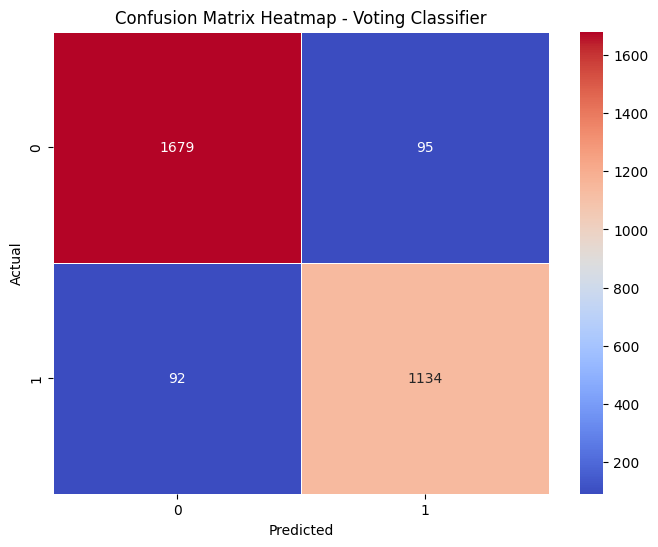

In [115]:
# plotting Confusion Matrix heatmap for Voting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_voting, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.title('Confusion Matrix Heatmap - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [116]:
# compare performance with individual models
print(f"Random Forest Accuracy: {metrics.accuracy_score(y_test, rf_best.predict(x_test))}")
print(f"Decision Tree Accuracy: {metrics.accuracy_score(y_test, dt_best.predict(x_test))}")
print(f"KNN Accuracy: {metrics.accuracy_score(y_test, knn_best.predict(x_test))}")
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# classification reports for individual models
print("Random Forest Classification Report:\n", metrics.classification_report(y_test, rf_best.predict(x_test)))
print("Decision Tree Classification Report:\n", metrics.classification_report(y_test, dt_best.predict(x_test)))
print("KNN Classification Report:\n", metrics.classification_report(y_test, knn_best.predict(x_test)))

Random Forest Accuracy: 0.939
Decision Tree Accuracy: 0.9353333333333333
KNN Accuracy: 0.8676666666666667
Voting Classifier Accuracy: 0.9376666666666666
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1774
           1       0.93      0.92      0.92      1226

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1774
           1       0.92      0.92      0.92      1226

    accuracy                           0.94      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.94      0.94      0.94      3000

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88 